# Neural Network with Logistic Regression

In [2]:
import numpy as np

In [3]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [4]:
sigmoid(np.array([0,2]))

array([0.5       , 0.88079708])

In [5]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b

In [6]:
dim = 2 
initialize_with_zeros(dim)

(array([[0.],
        [0.]]),
 0)

## Feed Forward and Backward Propagation

In [7]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # forward propagatioin
    
    computing = np.dot(w.T, X) + b
    Activation = sigmoid(computing)
    cost = (-1/m) * np.sum(Y*np.log(Activation) + (1-Y) * np.log(1-Activation))
    
    # Backward Propagation
    dw = (1/m) * np.dot(X, ((Activation-Y).T))
    db = (1/m) * np.sum(Activation - Y)
    
    grad = {'dw': dw,
            'db': db}
    return grad, cost

In [8]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print(grads, cost)

{'dw': array([[0.99845601],
       [2.39507239]]), 'db': 0.001455578136784208} 5.801545319394553


## Optimization

In [10]:
def optimize(w, b, X, Y, num_iteration, learning_rate):
    costs = []
    all_costs = []
    for i in range(num_iteration):
        grads, cost = propagate(w, b, X, Y)
        all_costs.append(cost)
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            print(f"cost after iteration {i: 2f} : {cost}")
            costs.append(cost)
            
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, cost, all_costs

cost after iteration  0.000000 : 5.801545319394553
cost after iteration  100.000000 : 1.055933444321741
cost after iteration  200.000000 : 0.3783029181411113


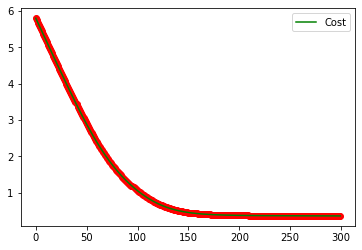

In [29]:
from matplotlib import pyplot as plt

costs = optimize(w, b, X, Y, num_iteration = 300, learning_rate = 0.009)

# cost ploting..
plt.scatter(range(len(costs[3])), costs[3], marker='o', color='red')
plt.plot(costs[3], color='green', label='Cost')
plt.legend()
plt.show()
